In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

from fastai.vision import *

plt.ion()

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls 

drive  sample_data


In [4]:
!unzip ./drive/'My Drive'/'Colab Notebooks'/model/model.zip

Archive:  ./drive/My Drive/Colab Notebooks/model/model.zip
   creating: train/
   creating: train/Abaddon/
  inflating: train/Abaddon/image-10.jpeg  
  inflating: train/Abaddon/image-11.jpeg  
  inflating: train/Abaddon/image-13.jpeg  
  inflating: train/Abaddon/image-14.jpeg  
  inflating: train/Abaddon/image-15.jpeg  
  inflating: train/Abaddon/image-16.jpeg  
  inflating: train/Abaddon/image-2.jpeg  
  inflating: train/Abaddon/image-20.jpeg  
  inflating: train/Abaddon/image-21.jpeg  
  inflating: train/Abaddon/image-3.jpeg  
  inflating: train/Abaddon/image-4.jpeg  
  inflating: train/Abaddon/image-5.jpeg  
  inflating: train/Abaddon/image-6.jpeg  
  inflating: train/Abaddon/image-7.jpeg  
  inflating: train/Abaddon/image-8.jpeg  
  inflating: train/Abaddon/image-9.jpeg  
  inflating: train/Abaddon/images-100.jpeg  
  inflating: train/Abaddon/images-101.jpeg  
  inflating: train/Abaddon/images-103.jpeg  
  inflating: train/Abaddon/images-105.jpeg  
  inflating: train/Abaddon/images

In [0]:
from pathlib import Path
PATH = Path('./')
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), bs=16, size=256)

In [6]:
torch.cuda.is_available()

True

In [33]:
model = cnn_learner(data, models.densenet201, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 81131730/81131730 [00:02<00:00, 27068491.88it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


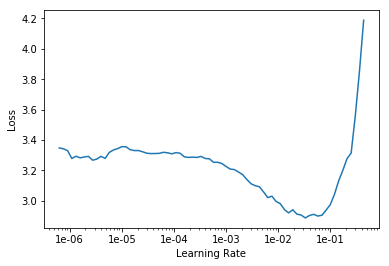

In [34]:
model.lr_find()
model.recorder.plot()

In [36]:
model.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.839618,0.769233,0.760526,01:28


In [37]:
model.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (5): ReLU(inplace)
   (6): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (8): ReLU(inplace)
   (9): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (10): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (11): ReLU(inplace)
   (12): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (14): ReLU(inplace)
   (15): Conv2d(128, 32, kernel_s

In [38]:
model.unfreeze()
model.fit_one_cycle(10, [1e-4, 1e-3, 1e-2])

epoch,train_loss,valid_loss,accuracy,time
0,1.588631,0.804821,0.750000,01:51
1,1.763294,1.438091,0.581579,01:51
2,1.769569,1.296055,0.605263,01:51
3,1.641884,0.933903,0.707895,01:51
4,1.475657,0.799105,0.763158,01:51
5,1.389390,0.610243,0.802632,01:51
6,1.264457,0.749606,0.855263,01:51
7,1.103550,0.636827,0.852632,01:51
8,0.920905,0.390983,0.884211,01:51
9,0.890967,0.410628,0.884211,01:51


In [0]:
model.export('densenet201.pkl')

In [31]:
data.train_ds[666]

(Image (3, 256, 256), Category Anti-Mage)